# Import site-libs

In [1]:
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt

# Load data

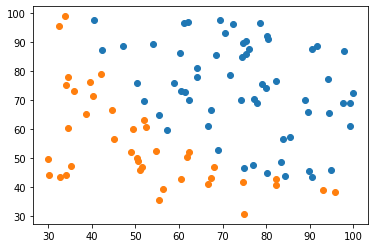

In [2]:
data = np.loadtxt("ex2data1.txt", dtype=np.float64, delimiter=',')
x = data[:,:2]
y = data[:,2:]
plt.scatter(x[np.squeeze(y==True)][:,0],x[np.squeeze(y==True)][:,1])
plt.scatter(x[np.squeeze(y==False)][:,0],x[np.squeeze(y==False)][:,1])
plt.show()

# Define Parameters

In [3]:
theta = np.random.randn(3, 1)

# Define Hyper-Parameters

In [4]:
epoch = 2000000
lr = 0.001
log = []

# Preparing Data
Adding column 1

In [5]:
x = np.concatenate((np.ones(shape=(len(x), 1)), x), axis=1)
print(x.shape)

(100, 3)


# Define Sigmoid

In [6]:
def sigmoid(x:np.ndarray):
    return 1 / (1 + np.exp(-x))

# Define Loss and its Derivative

In [7]:
def loss(y0:np.ndarray, y:np.ndarray):
    """
    y0 is predicted sigmoid function
    y is real labelling
    """
    return (-y * np.log(y0) - (1 - y) * np.log(1 - y0)).mean()

In [8]:
def derivative(x:np.ndarray, theta:np.ndarray, y:np.ndarray):
    y0 = sigmoid(np.dot(x, theta))
    lost = loss(y0, y)
    d_ = np.dot(x.T, (y0 - y)) / len(y)
    return d_, lost

# Trainning

100%|██████████| 2000000/2000000 [00:59<00:00, 33528.60it/s]


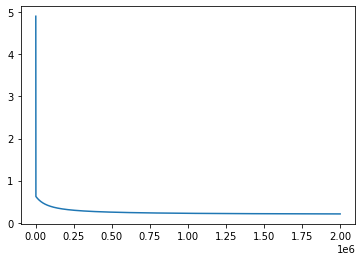

In [9]:
for i in tqdm(range(epoch)):
    step, lost = derivative(x, theta, y)
    log.append(lost)
    theta -= step * lr
plt.plot(list(range(len(log))), log)

# Testing

In [13]:
print("Accuracy for training set: ", ((sigmoid(np.dot(x, theta)) > 0.5) ==  y).sum() / len(y) * 100)

Accuracy for training set:  89.0


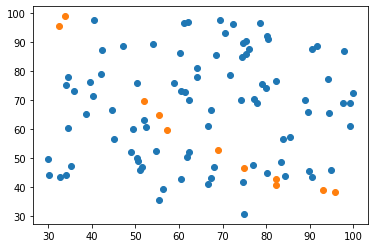

In [14]:
plt.scatter(x[np.squeeze((sigmoid(np.dot(x, theta)) > 0.5) ==  y)][:,1],
x[np.squeeze((sigmoid(np.dot(x, theta)) > 0.5) ==  y)][:,2])
plt.scatter(x[np.squeeze((sigmoid(np.dot(x, theta)) > 0.5) !=  y)][:,1],
x[np.squeeze((sigmoid(np.dot(x, theta)) > 0.5) !=  y)][:,2])